In [1]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

# Determine the good quality episodes of no movement

In [2]:
with open('python/methods.py', 'r') as file:
    exec(file.read())

In [3]:
data = read_pickle('output/spontaneous-movement/W1/C1/emg/filter.pkl')
events = read_pickle('output/spontaneous-movement/W1/C1/emg/all_no_movement.pkl')

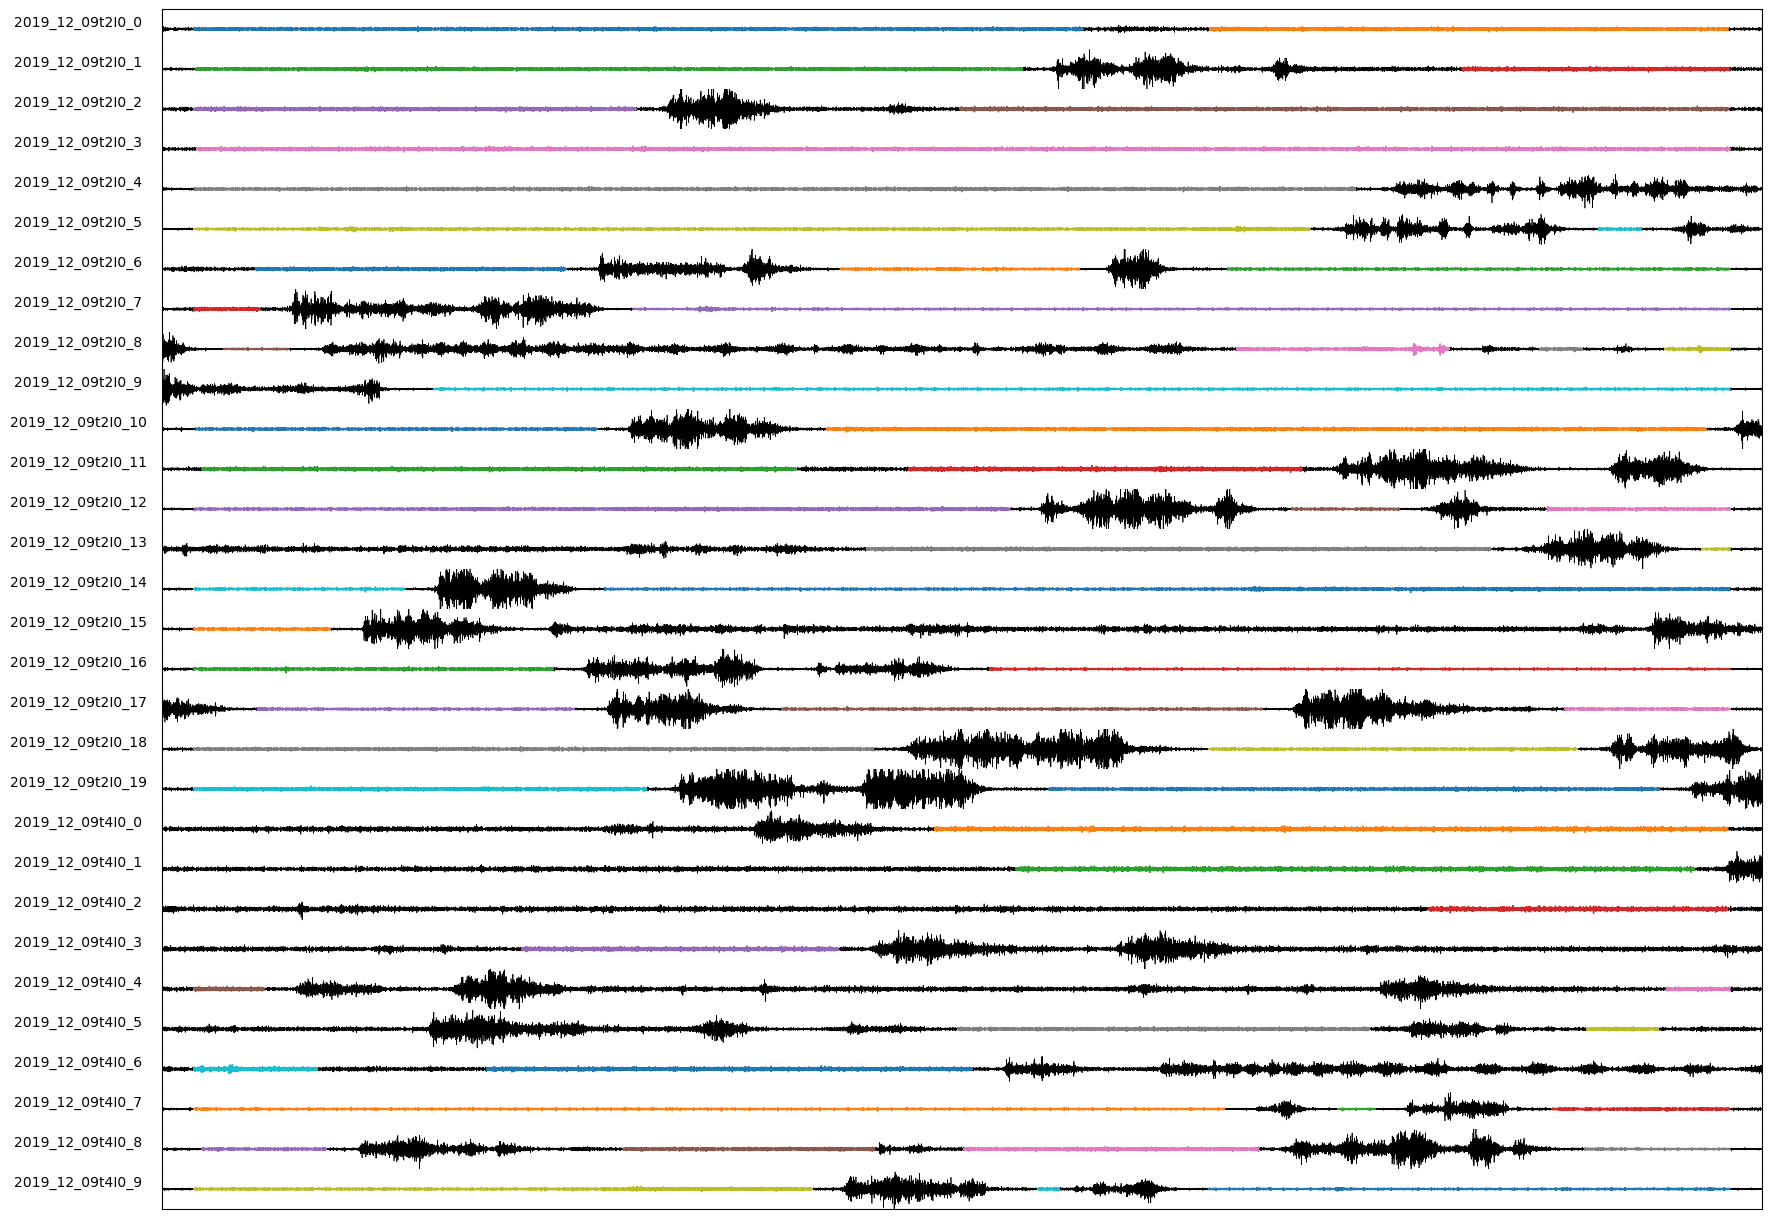

In [4]:
figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

color_list = list(mcolors.TABLEAU_COLORS.keys())

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-4, 4)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        start = int(row['EventStart'])
        end = int(row['EventEnd'])
        color = color_list[index % len(color_list)]

        axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = color)

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()